In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [7]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing training and validation data
train_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'
val_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)  #scales the pixel value from [0,255] to [0,1]


#generator objects for both training and validation sets are created using the 'flow_from_directory' method
#yields batches of augmented and preprocessed images with labels
train_generator = train_datagen.flow_from_directory(      #preprocess taining data
        train_dir,
        target_size=(48,48),      #target_size parameter specifies the size to which the images should be resized
        batch_size=64,            #batch_size is the size of the batches that will be yielded by the generator
        color_mode="grayscale",   # color_mode specifies the number of color channels
        class_mode='categorical') #class_mode specifies the type of labels

validation_generator = val_datagen.flow_from_directory(     #preprocess validation data
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

emotion_model = Sequential()   #The model is created using the Sequential model class from Keras. 
                               #This allows us to add layers to the model in a sequential order.


#input_shape parameter specifies the shape of the input data.
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1))) #kernel_size parameter specifies the size of the filters
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  #activation specifies the activation function to be used
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) 
#MaxPooling2D layer downsamples the feature maps produced by the convolutional layer by taking the maximum value in each pooling window
#The pool_size parameter specifies the size of the pooling window.

emotion_model.add(Dropout(0.25))
#Two dropout layers (Dropout) are added after the first and last pooling layers. 
# This layer randomly drops out a certain percentage of the neurons in the layer during training to prevent overfitting.

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# flattened output is passed through two fully connected (Dense) layers.
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

# The loss parameter specifies the loss function to be used, which is categorical cross-entropy in this case.
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
#The metrics parameter specifies the metric to be used to evaluate the performance of the model during training, which is accuracy in this case.

emotion_model_info = emotion_model.fit(
        #The train_generator and validation_generator are passed as inputs to this method
        train_generator, 
        #The steps_per_epoch and validation_steps parameters specify the number of batches to be yielded by the generators in one epoch.
        steps_per_epoch=28709 // 64,
        epochs=50, 
        validation_data=validation_generator,  
        validation_steps=7178 // 64)

emotion_model.save('model.keras')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
448/448 [==============================] - 13s 27ms/step - loss: 1.7934 - accuracy: 0.2652 - val_loss: 1.6810 - val_accuracy: 0.3499
Epoch 2/50
448/448 [==============================] - 12s 26ms/step - loss: 1.6045 - accuracy: 0.3781 - val_loss: 1.5168 - val_accuracy: 0.4240
Epoch 3/50
448/448 [==============================] - 11s 26ms/step - loss: 1.4952 - accuracy: 0.4276 - val_loss: 1.4369 - val_accuracy: 0.4488
Epoch 4/50
448/448 [==============================] - 12s 26ms/step - loss: 1.4245 - accuracy: 0.4585 - val_loss: 1.3820 - val_accuracy: 0.4707
Epoch 5/50
448/448 [==============================] - 12s 26ms/step - loss: 1.3684 - accuracy: 0.4814 - val_loss: 1.3382 - val_accuracy: 0.4920
Epoch 6/50
448/448 [==============================] - 11s 26ms/step - loss: 1.3267 - accuracy: 0.4980 - val_loss: 1.3054 - val_accuracy: 0.5025
Epoch 7/50
448/448 [==============================]

In [84]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.model_selection import train_test_split

start_time = time.time()

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 64
epochs = 500

# Load and preprocess the data using your existing code
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# Split the data into training and validation sets
X, y = datagen_with_preprocessing.next()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a custom CNN model
model = Sequential()
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

# Add fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.000001, decay = 1e-6), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model using the generator
model.fit(X_train, y_train, len(X_train), epochs=epochs, validation_data=(X_val, y_val))

plot_training_history(model.history)

# Calculate and print the total time taken for training
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")

Found 28709 images belonging to 7 classes.
Epoch 1/500
1/1 [==============================] - 1s 825ms/step - loss: 3.1788 - categorical_accuracy: 0.1176 - val_loss: 1.9824 - val_categorical_accuracy: 0.0769
Epoch 2/500
1/1 [==============================] - 0s 67ms/step - loss: 3.2629 - categorical_accuracy: 0.1765 - val_loss: 1.9776 - val_categorical_accuracy: 0.0769
Epoch 3/500
1/1 [==============================] - 0s 71ms/step - loss: 2.9725 - categorical_accuracy: 0.1961 - val_loss: 1.9729 - val_categorical_accuracy: 0.0769
Epoch 4/500
1/1 [==============================] - 0s 60ms/step - loss: 3.2684 - categorical_accuracy: 0.2157 - val_loss: 1.9684 - val_categorical_accuracy: 0.0769
Epoch 5/500
1/1 [==============================] - 0s 78ms/step - loss: 3.2106 - categorical_accuracy: 0.2353 - val_loss: 1.9641 - val_categorical_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 73ms/step - loss: 3.2789 - categorical_accuracy: 0.2157 - val_loss: 1.9600 - v

KeyboardInterrupt: 

Found 28709 images belonging to 7 classes.
Epoch 1/20
1/1 [==============================] - 1s 895ms/step - loss: 4.3228 - categorical_accuracy: 0.2256 - val_loss: 3.4247 - val_categorical_accuracy: 0.0015
Epoch 2/20
1/1 [==============================] - 1s 636ms/step - loss: 3.9393 - categorical_accuracy: 0.2889 - val_loss: 3.4154 - val_categorical_accuracy: 0.0015
Epoch 3/20
1/1 [==============================] - 0s 294ms/step - loss: 3.5725 - categorical_accuracy: 0.3687 - val_loss: 3.4070 - val_categorical_accuracy: 0.0015
Epoch 4/20
1/1 [==============================] - 0s 272ms/step - loss: 3.3085 - categorical_accuracy: 0.4324 - val_loss: 3.3990 - val_categorical_accuracy: 0.0015
Epoch 5/20
1/1 [==============================] - 0s 299ms/step - loss: 3.0783 - categorical_accuracy: 0.5046 - val_loss: 3.3913 - val_categorical_accuracy: 0.0046
Epoch 6/20
1/1 [==============================] - 0s 310ms/step - loss: 2.8723 - categorical_accuracy: 0.5588 - val_loss: 3.3839 - val_ca

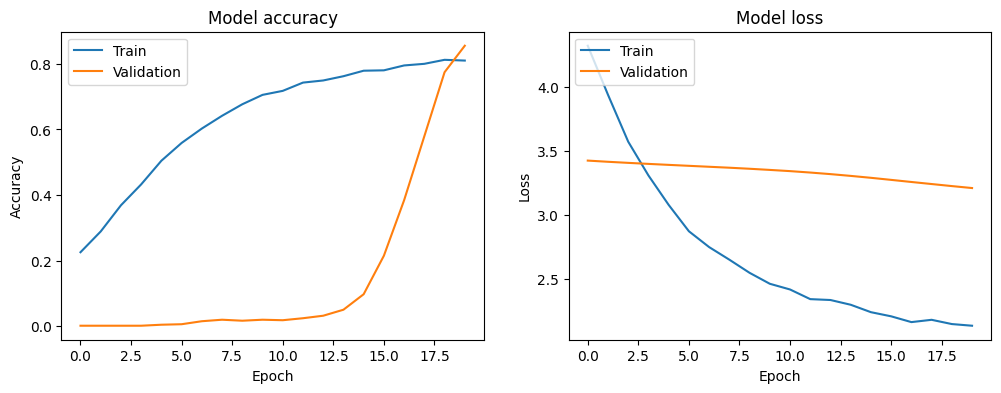

26/26 [==============================] - 1s 21ms/step - loss: 3.2067 - categorical_accuracy: 0.8841
Test Loss: 3.2067489624023438
Test Accuracy: 0.8841463327407837
Total training time: 8.532222032546997 seconds


In [79]:
from tensorflow.keras.regularizers import l2
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split

start_time = time.time()

# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Input size for VGGNet
num_classes = 7  # Automatically determine the number of classes
batch_size = 4096
epochs = 20

# Load and preprocess the data using your existing code
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle = False,
)

# Split the data into training and validation sets
X, y = datagen_with_preprocessing.next()
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

model = Sequential()
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

# Add fully connected layers with L2 regularization
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001, decay = 1e-6), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model using the generator
model.fit(X_train, y_train, len(X_train), epochs=epochs, validation_data=(X_val, y_val))

plot_training_history(model.history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
model.save("CNN_shuffle_False.keras")

# Calculate and print the total time taken for training
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")

In [80]:
test_data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/test'

# Define constants
input_shape = (48, 48, 1)  # Update with the appropriate input shape
batch_size = 1024  # Adjust the batch size if needed

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # You may need to adjust the preprocessing steps

# Load and preprocess the test data
test_data_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(48, 48),
    color_mode='grayscale',  # Update with the color mode used for your model
    batch_size=batch_size,
    class_mode='categorical',  # Update according to your problem
    shuffle=False  # Make sure shuffle is set to False for testing
)

X_test, y_test = test_data_generator.next()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Found 7178 images belonging to 7 classes.
32/32 [==============================] - 1s 16ms/step - loss: 3.2054 - categorical_accuracy: 0.8633
Test accuracy: 86.33%
